# Gradient Descent (linear regression)
基于搜索，最小化损失函数

## Note that many functions has multiple extremums. Therefore, select starting point and run multiple times. (In the examples below, we only focus on linear regression problems, which only have 1 extremum)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a loss function for testing
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1

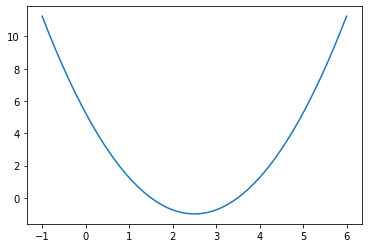

In [3]:
plt.plot(plot_x, plot_y)
plt.show()

In [4]:
def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf')

In [5]:
def dJ(theta):
    return 2 * (theta - 2.5)

In [6]:
theta = 0.0
eta = 0.1  # learning rate
epsilon = 1e-8
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - gradient * eta
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


In [7]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0  # Avoid infinite loops
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - gradient * eta
        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1

def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
    plt.show()

## Empirically, we set eta to 0.01, which serves well in most cases. 
### Note that eta = 1 is not a boundry where when eta > 1, we can't get the optimal theta

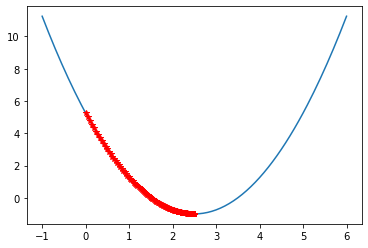

424

In [8]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
len(theta_history)

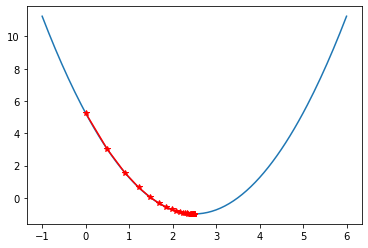

46

In [9]:
eta = 0.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
len(theta_history)

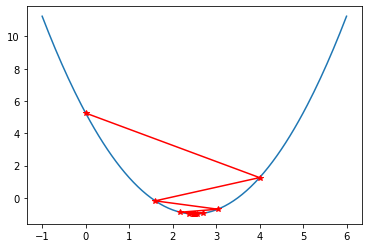

22

In [10]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
len(theta_history)

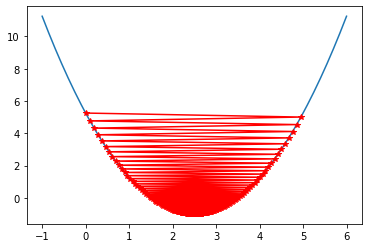

424

In [11]:
eta = 0.99
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
len(theta_history)

## For linear regression with more than 1 features

In [12]:
np.random.seed(600)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [13]:
X = x.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100,))

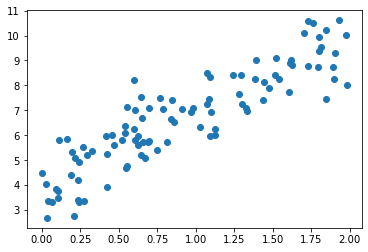

In [14]:
plt.scatter(x, y)
plt.show()

In [15]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0  # Avoid infinite loops
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - gradient * eta
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [16]:
X_b = np.hstack((np.ones((len(x), 1)), X))
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
gradient_descent(X_b, y, initial_theta, eta)

array([4.00628035, 2.93481291])

In [17]:
theta

2.499891109642585

## Extract the process of gradient descent to fun_machine_learning.linear_regression

In [18]:
from fun_machine_learning.linear_regression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [19]:
lin_reg.coef_, lin_reg.interception_

(array([2.93481291]), 4.006280351207853)

## Vectorize gradient descent to facilitate computation

In [20]:
from sklearn import datasets

In [21]:
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50]
y = y[y < 50]
X.shape, y.shape

((490, 13), (490,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=600)

In [23]:
from fun_machine_learning import linear_regression
%time lin_reg1 = LinearRegression()
lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.11 µs


0.7344367205330666

In [24]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/linear_regression.py:26: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/linear_regression.py:47: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/linear_regression.py:38: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)


LinearRegression()

In [25]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [26]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)
lin_reg2.score(X_test, y_test)

0.2803485831544015

In [27]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
lin_reg2.score(X_test, y_test)

CPU times: user 2min 7s, sys: 302 ms, total: 2min 7s
Wall time: 2min 8s


0.683494962884319

## Scale the data to improve performance

In [28]:
from sklearn.preprocessing import StandardScaler

In [32]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [33]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: user 147 ms, sys: 1.95 ms, total: 149 ms
Wall time: 148 ms


LinearRegression()

In [34]:
lin_reg3.score(X_test_standard, y_test)

0.7344182918311735

### Using gradient descent is faster for samples with more features

In [45]:
m = 1000
n = 9000
big_X = np.random.normal(size=(m,n))
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [46]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

CPU times: user 57.2 s, sys: 1.94 s, total: 59.2 s
Wall time: 10.8 s


LinearRegression()

In [47]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

CPU times: user 17.2 s, sys: 212 ms, total: 17.4 s
Wall time: 2.95 s


LinearRegression()